In [1]:
!pip install tqdm
!pip install nltk
!pip install spacy
!pip install datasets transformers


[notice] A new release of pip is available: 23.0.1 -> 23.3.1
[notice] To update, run: pip install --upgrade pip
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 18.2 MB/s eta 0:00:0000:010:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 777.0/777.0 kB 40.5 MB/s eta 0:00:00

[notice] A new release of pip is available: 23.0.1 -> 23.3.1
[notice] To update, run: pip install --upgrade pip
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.7/6.7 MB 42.7 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.0/57.0 kB 6.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 395.8/395.8 kB 34.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 494.3/494.3 kB 34.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 932.6/932.6 kB 46.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.4/46.4 kB 4.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.9/45.9 kB 5.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [2]:
import os
import re
import numpy as np 
import pandas as pd 
from tqdm import tqdm
import matplotlib.pyplot as plt
import spacy
import seaborn as sns
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

In [5]:
tqdm.pandas()
data = pd.read_csv("/kaggle/input/quora-augmented-dataset/Quora_Augmented.csv")
data

,question1,question2,is_duplicate
0,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0.0
1,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0.0
2,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0.0
3,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0.0
4,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0.0
...,...,...,...
460096,"Aside from the essays, what were the differenc...",What were the differences between your busines...,1.0
460097,How do I kill procrastination?,How to Kill Procrastination & amp ; Debate,1.0
460098,What should I do to control my anger towards m...,"In an aggressive economy, anger or anger is an...",1.0
460099,"What is the easiest, painless way to die insta...","The quickest, painless way to die: instantly @...",1.0


In [8]:
data.dropna(inplace=True)
def text_cleaning(x):
    questions = re.sub('\s+\n+', ' ', x)
    questions = re.sub('[^a-zA-Z0-9]', ' ', questions)
    questions = questions.lower()
    return questions
data['question1_cleaned'] = data['question1'].progress_apply(text_cleaning)
data['question2_cleaned'] = data['question2'].progress_apply(text_cleaning)
data

100%|██████████| 460096/460096 [00:03<00:00, 123998.16it/s]


,question1,question2,is_duplicate,question1_cleaned,question2_cleaned
0,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0.0,what is the step by step guide to invest in sh...,what is the step by step guide to invest in sh...
1,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0.0,what is the story of kohinoor koh i noor dia...,what would happen if the indian government sto...
2,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0.0,how can i increase the speed of my internet co...,how can internet speed be increased by hacking...
3,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0.0,why am i mentally very lonely how can i solve...,find the remainder when math 23 24 math i...
4,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0.0,which one dissolve in water quikly sugar salt...,which fish would survive in salt water
...,...,...,...,...,...
460096,"Aside from the essays, what were the differenc...",What were the differences between your busines...,1.0,aside from the essays what were the differenc...,what were the differences between your busines...
460097,How do I kill procrastination?,How to Kill Procrastination & amp ; Debate,1.0,how do i kill procrastination,how to kill procrastination amp debate
460098,What should I do to control my anger towards m...,"In an aggressive economy, anger or anger is an...",1.0,what should i do to control my anger towards m...,in an aggressive economy anger or anger is an...
460099,"What is the easiest, painless way to die insta...","The quickest, painless way to die: instantly @...",1.0,what is the easiest painless way to die insta...,the quickest painless way to die instantly ...


In [10]:
data['question1_lens'] = data['question1_cleaned'].apply(lambda x: len(x.split()))
data['question2_lens'] = data['question2_cleaned'].apply(lambda x: len(x.split()))
q1 = data['question1_lens'].quantile(0.25)
q3 = data['question1_lens'].quantile(0.75)
upper_outlier = q3 + 1.5*(q3-q1)
print(upper_outlier)

22.0


In [12]:
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import LSTM, Bidirectional
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.layers import Embedding, Layer, Dense, Dropout, MultiHeadAttention, LayerNormalization, Input, GlobalAveragePooling1D
from transformers import AutoTokenizer,DataCollatorWithPadding,TFAutoModel,DistilBertConfig,TFDistilBertModel, BertConfig, TFBertModel, TFRobertaModel
from sklearn.model_selection import train_test_split
from datasets import load_dataset
from sklearn.utils import shuffle

D1106 05:12:22.819677518      15 config.cc:119]                        gRPC EXPERIMENT tcp_frame_size_tuning               OFF (default:OFF)
D1106 05:12:22.819702331      15 config.cc:119]                        gRPC EXPERIMENT tcp_rcv_lowat                       OFF (default:OFF)
D1106 05:12:22.819706169      15 config.cc:119]                        gRPC EXPERIMENT peer_state_based_framing            OFF (default:OFF)
D1106 05:12:22.819709033      15 config.cc:119]                        gRPC EXPERIMENT flow_control_fixes                  ON  (default:ON)
D1106 05:12:22.819711925      15 config.cc:119]                        gRPC EXPERIMENT memory_pressure_controller          OFF (default:OFF)
D1106 05:12:22.819714839      15 config.cc:119]                        gRPC EXPERIMENT unconstrained_max_quota_buffer_size OFF (default:OFF)
D1106 05:12:22.819717625      15 config.cc:119]                        gRPC EXPERIMENT new_hpack_huffman_decoder           ON  (default:ON)
D1106 05:12:22.

In [13]:
model_checkpoint = 'bert-large-uncased'
tokenizer = AutoTokenizer.from_pretrained(model_checkpoint)

In [17]:
def encode_text(text, tokenizer):
    encoded = tokenizer.batch_encode_plus(
        text,
        add_special_tokens=True,
        max_length=50,
        padding='max_length',
        truncation=True,
        return_attention_mask=True,
        return_tensors="tf",
    )
    input_ids = np.array(encoded["input_ids"], dtype="int32")
    attention_masks = np.array(encoded["attention_mask"], dtype="int32")
    return {
        "input_ids": input_ids,
        "attention_masks": attention_masks
    }

data = shuffle(data, random_state=42)  # `random_state` for reproducibility
data

,question1,question2,is_duplicate,question1_cleaned,question2_cleaned,question1_lens,question2_lens
414092,Is Stock Android better?,How will #stockarapps come up with #tradeoffs?,1.0,is stock android better,how will stockarapps come up with tradeoffs,4,7
198146,Does anyone personally know any decent hacker?,Does anyone personally know any decent hackers?,1.0,does anyone personally know any decent hacker,does anyone personally know any decent hackers,7,7
75590,How do I convert a decimal number to 32- bit hex?,I am a structural engineer but I am confused w...,0.0,how do i convert a decimal number to 32 bit hex,i am a structural engineer but i am confused w...,11,19
399293,How do I get pregnant faster?,What can I do to get pregnant faster?,1.0,how do i get pregnant faster,what can i do to get pregnant faster,6,8
17823,Is a digital profit course fake or a scam?,Is the Ace Profits Academy a scam?,0.0,is a digital profit course fake or a scam,is the ace profits academy a scam,9,7
...,...,...,...,...,...,...,...
259180,Is this true that Rs 2000 note in India are em...,Is the new 2000 Rupee note really implementing...,1.0,is this true that rs 2000 note in india are em...,is the new 2000 rupee note really implementing...,14,12
365841,What are some examples of mixtures?,What are mixtures? What are some examples of t...,1.0,what are some examples of mixtures,what are mixtures what are some examples of t...,6,9
131933,Should we report Quorans who spout crackpot Ph...,"In a simple and more general language, what is...",0.0,should we report quorans who spout crackpot ph...,in a simple and more general language what is...,8,21
146868,Where can I buy very incredible and most amazi...,Where can I get wonderful flavors on cupcakes ...,1.0,where can i buy very incredible and most amazi...,where can i get wonderful flavors on cupcakes ...,13,11


In [19]:
data = data.sample(460096)
train = data.iloc[:int(460096*0.80),:]
val = data.iloc[int(460096*0.80):,:]
X1_train = encode_text(train['question1_cleaned'].tolist(), tokenizer)
X2_train = encode_text(train['question2_cleaned'].tolist(), tokenizer)
X1_val = encode_text(val['question1_cleaned'].tolist(), tokenizer)
X2_val = encode_text(val['question2_cleaned'].tolist(), tokenizer)
y_train = train['is_duplicate'].values
y_val = val['is_duplicate'].values

try:
    tpu = tf.distribute.cluster_resolver.TPUClusterResolver()
    tf.config.experimental_connect_to_cluster(tpu)
    tf.tpu.experimental.initialize_tpu_system(tpu)
    strategy = tf.distribute.experimental.TPUStrategy(tpu)
    BATCH_SIZE = strategy.num_replicas_in_sync * 4
    print("Running on TPU:", tpu.master())
    print(f"Batch Size: {BATCH_SIZE}")
except ValueError:
    strategy = tf.distribute.get_strategy()
    BATCH_SIZE = 32
    print(f"Running on {strategy.num_replicas_in_sync} replicas")
    print(f"Batch Size: {BATCH_SIZE}")  

INFO:tensorflow:Deallocate tpu buffers before initializing tpu system.
INFO:tensorflow:Initializing the TPU system: local
INFO:tensorflow:Finished initializing TPU system.


INFO:tensorflow:Found TPU system:


INFO:tensorflow:Found TPU system:


INFO:tensorflow:*** Num TPU Cores: 8


INFO:tensorflow:*** Num TPU Cores: 8


INFO:tensorflow:*** Num TPU Workers: 1


INFO:tensorflow:*** Num TPU Workers: 1


INFO:tensorflow:*** Num TPU Cores Per Worker: 8


INFO:tensorflow:*** Num TPU Cores Per Worker: 8


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU:0, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU:0, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU:1, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU:1, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU:2, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU:2, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU:3, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU:3, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU:4, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU:4, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU:5, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU:5, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU:6, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU:6, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU:7, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU:7, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU_SYSTEM:0, TPU_SYSTEM, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU_SYSTEM:0, TPU_SYSTEM, 0, 0)


Running on TPU: 
Batch Size: 32


In [20]:
class L1Dist(Layer):
    def __init__(self,**kwargs):
        super().__init__()
    def call(self,embedding1,embedding2):
        return tf.math.abs(embedding1 - embedding2)

In [21]:
with strategy.scope():
    transformer_model = TFBertModel.from_pretrained(model_checkpoint)
    input_ids_in1 = Input(shape=(None,),name='input_ids1', dtype='int32')
    input_masks_in1 = Input(shape=(None,), name='attention_mask1', dtype='int32')
    input_ids_in2 = Input(shape=(None,),name='input_ids2', dtype='int32')
    input_masks_in2 = Input(shape=(None,), name='attention_mask2', dtype='int32')
    embedding_layer1 = transformer_model(input_ids_in1, attention_mask=input_masks_in1).last_hidden_state
    embedding_layer2 = transformer_model(input_ids_in2, attention_mask=input_masks_in2).last_hidden_state
    embedding1 = GlobalAveragePooling1D()(embedding_layer1)
    embedding2 = GlobalAveragePooling1D()(embedding_layer2)
    l1_dist = L1Dist()(embedding1,embedding2)
    x = Dense(768, activation='relu')(l1_dist)
    output = Dense(1, activation='sigmoid')(x)
    model = Model(inputs=[input_ids_in1, input_masks_in1, input_ids_in2, input_masks_in2], outputs = output)
    model.compile(loss='binary_crossentropy',optimizer=tf.keras.optimizers.Adam(learning_rate=0.00001),metrics='accuracy')

Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFBertModel: ['cls.predictions.transform.dense.weight', 'cls.seq_relationship.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.seq_relationship.bias', 'cls.predictions.bias']
- This IS expected if you are initializing TFBertModel from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
All the weights of TFBertModel were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions w

In [23]:
for layer in model.layers[:5]:
    layer.trainable = False
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_ids1 (InputLayer)        [(None, None)]       0           []                               
                                                                                                  
 attention_mask1 (InputLayer)   [(None, None)]       0           []                               
                                                                                                  
 input_ids2 (InputLayer)        [(None, None)]       0           []                               
                                                                                                  
 attention_mask2 (InputLayer)   [(None, None)]       0           []                               
                                                                                              

In [25]:
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
earlystopping = EarlyStopping(monitor='val_loss',min_delta = 0, patience = 5, verbose = 1, restore_best_weights=True)
learning_rate_reduction = ReduceLROnPlateau(monitor='val_loss', patience=3, verbose=1, factor=0.3, min_lr=0.00000001)

In [ ]:
history = model.fit((np.asarray(X1_train['input_ids']),np.asarray(X1_train['attention_masks']),np.asarray(X2_train['input_ids']),np.asarray(X2_train['attention_masks'])), y_train, batch_size=BATCH_SIZE, epochs=7,validation_data=((np.asarray(X1_val['input_ids']),np.asarray(X1_val['attention_masks']),np.asarray(X2_val['input_ids']),np.asarray(X2_val['attention_masks'])), y_val),callbacks=[earlystopping, learning_rate_reduction])

Epoch 1/7


2023-11-06 05:15:29.153309: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] model_pruner failed: INVALID_ARGUMENT: Graph does not contain terminal node AssignAddVariableOp.
2023-11-06 05:15:32.178521: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] model_pruner failed: INVALID_ARGUMENT: Graph does not contain terminal node AssignAddVariableOp.


11503/11503 [==============================] - ETA: 0s - loss: 0.4476 - accuracy: 0.7777

2023-11-06 05:50:33.443053: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] model_pruner failed: INVALID_ARGUMENT: Graph does not contain terminal node AssignAddVariableOp.
2023-11-06 05:50:34.243180: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] model_pruner failed: INVALID_ARGUMENT: Graph does not contain terminal node AssignAddVariableOp.


11503/11503 [==============================] - 2322s 183ms/step - loss: 0.4476 - accuracy: 0.7777 - val_loss: 0.3990 - val_accuracy: 0.8240 - lr: 1.0000e-05
Epoch 2/7
11503/11503 [==============================] - 1928s 168ms/step - loss: 0.3255 - accuracy: 0.8572 - val_loss: 0.3204 - val_accuracy: 0.8636 - lr: 1.0000e-05
Epoch 3/7
11503/11503 [==============================] - 1932s 168ms/step - loss: 0.2524 - accuracy: 0.8936 - val_loss: 0.3051 - val_accuracy: 0.8760 - lr: 1.0000e-05
Epoch 4/7
11503/11503 [==============================] - 1934s 168ms/step - loss: 0.1948 - accuracy: 0.9211 - val_loss: 0.3168 - val_accuracy: 0.8791 - lr: 1.0000e-05
Epoch 5/7
 2053/11503 [====>.........................] - ETA: 25:16 - loss: 0.1368 - accuracy: 0.9486

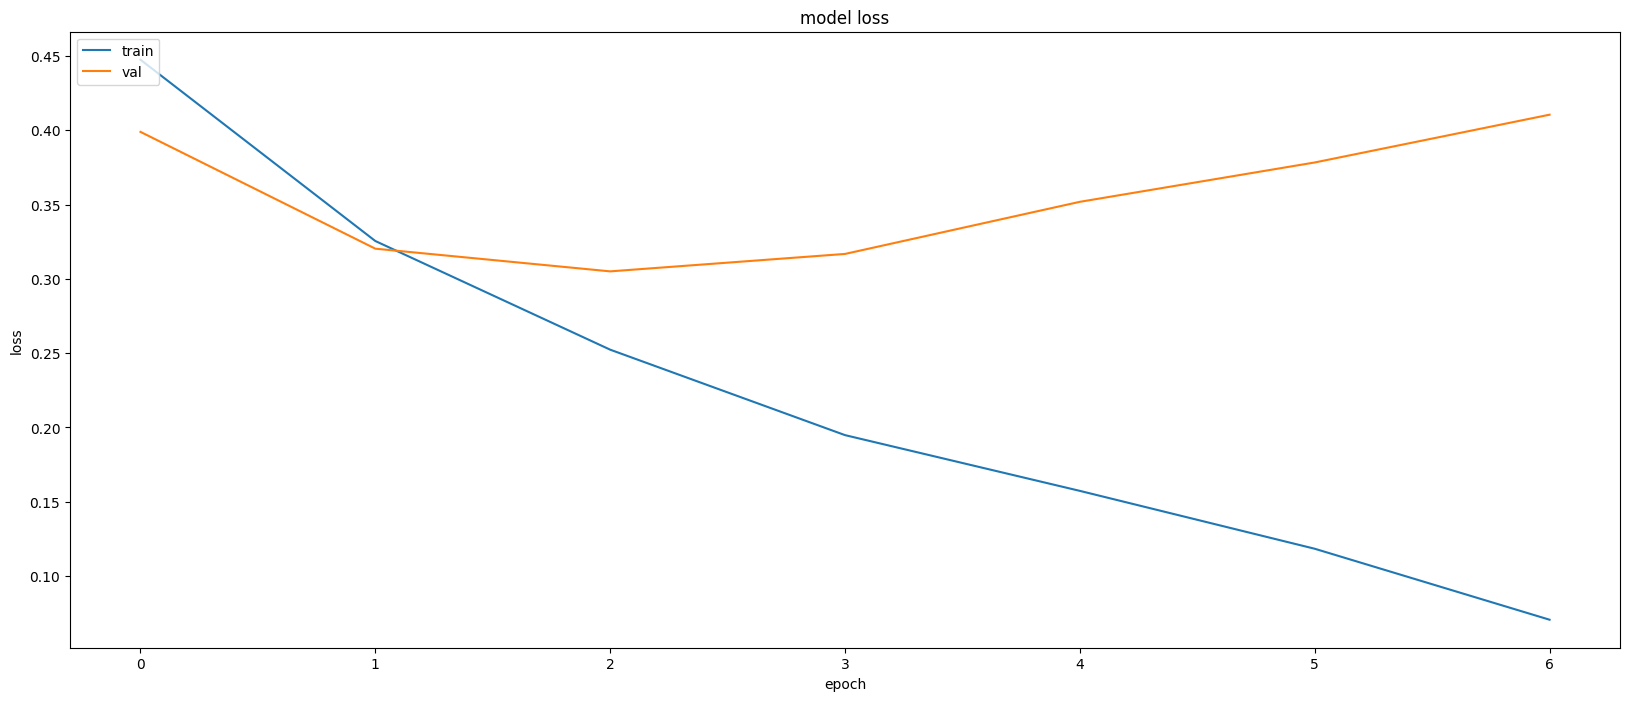

In [27]:
plt.figure(figsize=(20,8))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [28]:
model.save_weights('/kaggle/working/LargeBERTQuora')

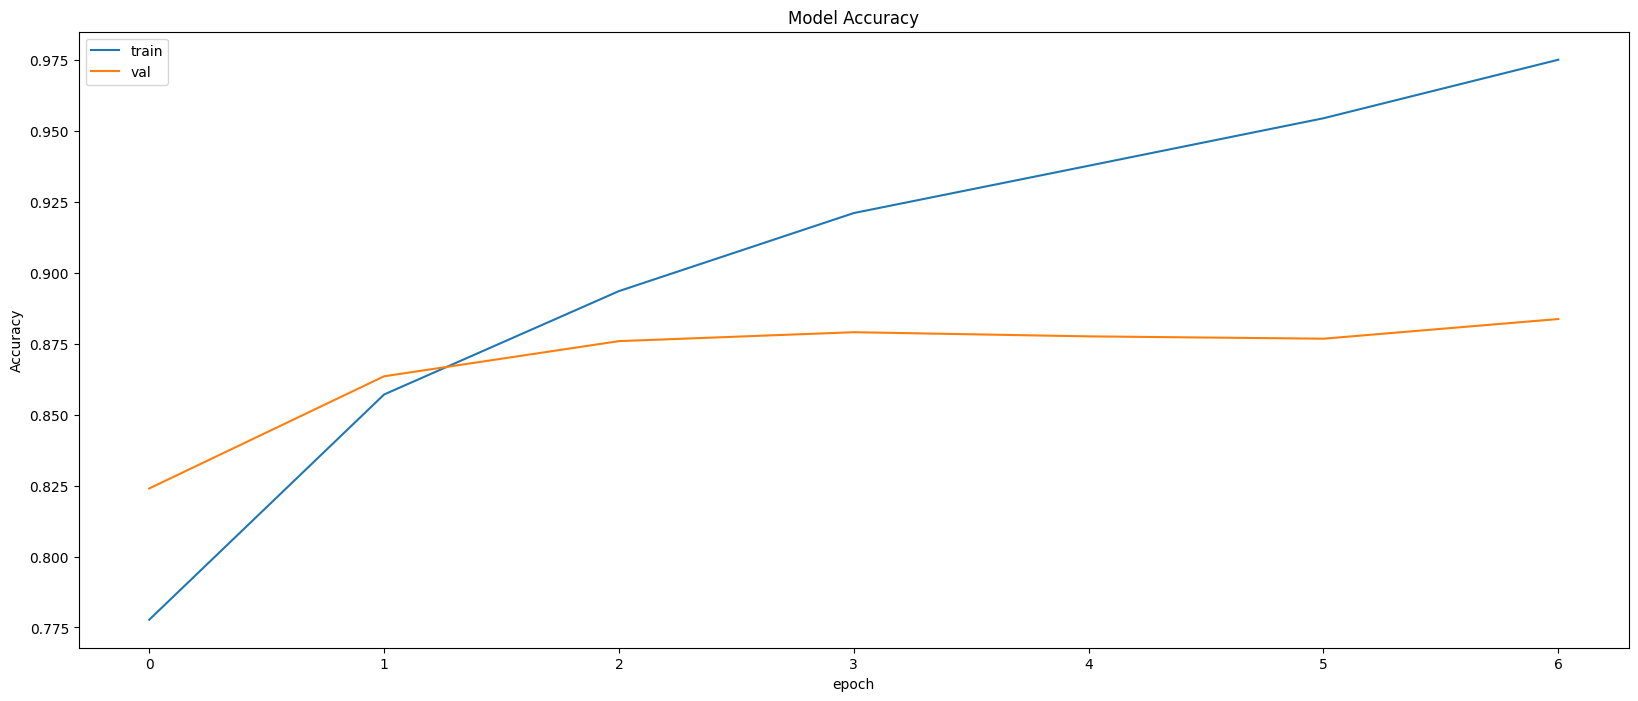

In [29]:
plt.figure(figsize=(20,8))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [30]:
y_pred = model.predict((np.asarray(X1_val['input_ids']),np.asarray(X1_val['attention_masks']),np.asarray(X2_val['input_ids']),np.asarray(X2_val['attention_masks'])))

2023-11-06 09:19:01.040720: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] model_pruner failed: INVALID_ARGUMENT: Graph does not contain terminal node AssignAddVariableOp.
2023-11-06 09:19:01.693724: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] model_pruner failed: INVALID_ARGUMENT: Graph does not contain terminal node AssignAddVariableOp.


2876/2876 [==============================] - 150s 40ms/step


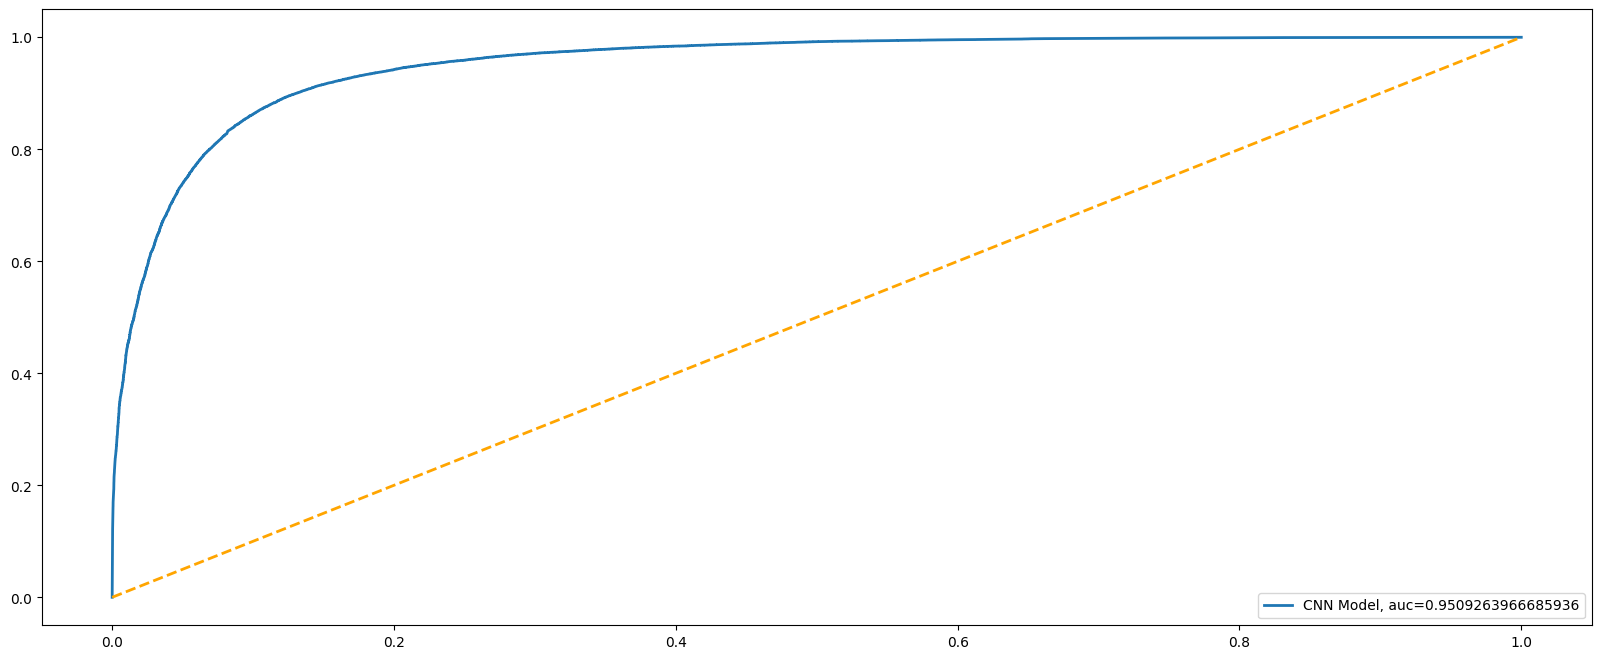

In [32]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve, recall_score
plt.figure(figsize=(20,8))
fpr, tpr, _ = roc_curve(y_val,  y_pred)
auc = roc_auc_score(y_val, y_pred)
plt.plot(fpr,tpr,label="CNN Model, auc="+str(auc),lw=2)
plt.plot([0, 1], [0, 1], color="orange", lw=2, linestyle="--")
plt.legend(loc=4)
plt.show()

In [33]:
!pip install seaborn

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.6/294.6 kB 6.3 MB/s eta 0:00:00a 0:00:01

[notice] A new release of pip is available: 23.0.1 -> 23.3.1
[notice] To update, run: pip install --upgrade pip


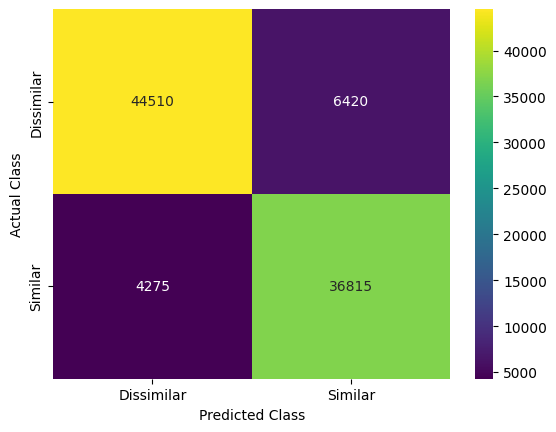

In [35]:
y_pred[y_pred>=0.5] = 1
y_pred[y_pred<0.5] = 0

sns.heatmap(confusion_matrix(y_val, y_pred),cmap='viridis',annot=True,fmt='.5g',xticklabels=['Dissimilar','Similar'],yticklabels=['Dissimilar','Similar'])
plt.xlabel('Predicted Class')
plt.ylabel('Actual Class')
plt.show()

In [36]:
print(classification_report(y_val,y_pred))

              precision    recall  f1-score   support

         0.0       0.91      0.87      0.89     50930
         1.0       0.85      0.90      0.87     41090

    accuracy                           0.88     92020
   macro avg       0.88      0.88      0.88     92020
weighted avg       0.89      0.88      0.88     92020

